## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px

## Loading DATA

In [3]:
df =pd.read_csv('data/dataset.csv')

In [7]:
df.head()

VIN (1-10)     County      City State  Postal Code  Model Year       Make  \
0  JTMEB3FV6N     Monroe  Key West    FL        33040        2022     TOYOTA   
1  1G1RD6E45D      Clark  Laughlin    NV        89029        2013  CHEVROLET   
2  JN1AZ0CP8B     Yakima    Yakima    WA        98901        2011     NISSAN   
3  1G1FW6S08H     Skagit  Concrete    WA        98237        2017  CHEVROLET   
4  3FA6P0SU1K  Snohomish   Everett    WA        98201        2019       FORD   

        Model                   Electric Vehicle Type  \
0  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
1        VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
2        LEAF          Battery Electric Vehicle (BEV)   
3     BOLT EV          Battery Electric Vehicle (BEV)   
4      FUSION  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible              42   
1           Clean Alternative Fuel Vehicle Eligible              38   
2           Clean Alternative Fuel Vehicle Eligible              73   
3           Clean Alternative Fuel Vehicle Eligible             238   
4             Not eligible due to low battery range              26   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0                   NaN       198968248   
1          0                   NaN         5204412   
2          0                  15.0       218972519   
3          0                  39.0       186750406   
4          0                  38.0         2006714   

              Vehicle Location        Electric Utility  2020 Census Tract  
0    POINT (-81.80023 24.5545)                     NaN        12087972100  
1  POINT (-114.57245 35.16815)                     NaN        32003005702  
2  POINT (-120.50721 46.60448)              PACIFICORP        53077001602  
3   POINT (-121.7515 48.53892)  PUGET SOUND ENERGY INC        53057951101  
4  POINT (-122.20596 47.97659)  PUGET SOUND ENERGY INC        53061041500

In [10]:
print(f'Rows: {df.shape[0]} \nColumns: {df.shape[1]}\n')
df.info()

Rows: 112634 
Columns: 17

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                          

In [13]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                 20
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 286
DOL Vehicle ID                                         0
Vehicle Location                                      24
Electric Utility                                     443
2020 Census Tract                                      0
dtype: int64

In [16]:
 # Fill missing values in 'Legislative District' with the mean
df['Legislative District'].fillna(df['Legislative District'].mean(),inplace=True)

In [18]:
 #Fill missing values in 'Model', 'Vehicle Location', and 'Electric Utility' with the mode
df['Model'].fillna(df['Model'].mode()[0], inplace=True)
df['Vehicle Location'].fillna(df['Vehicle Location'].mode()[0],inplace=True)
df['Electric Utility'].fillna(df['Electric Utility'].mode()[0],inplace=True)

In [20]:
# Check if all missing values are handled
print(df.isnull().sum())

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


In [14]:
df.duplicated().sum()

0

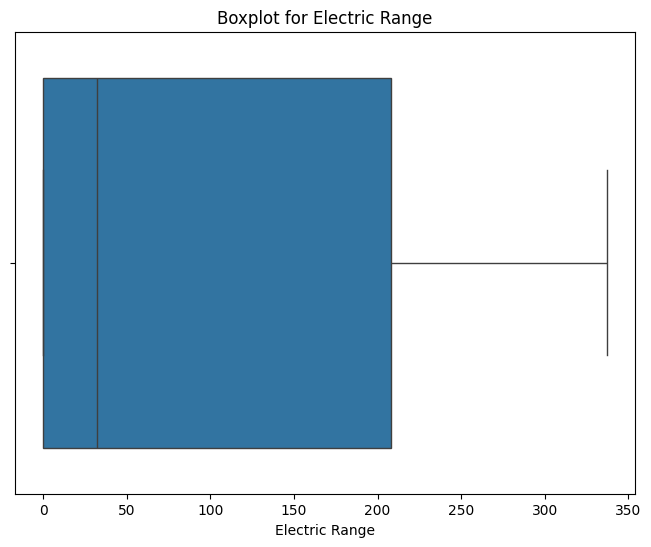

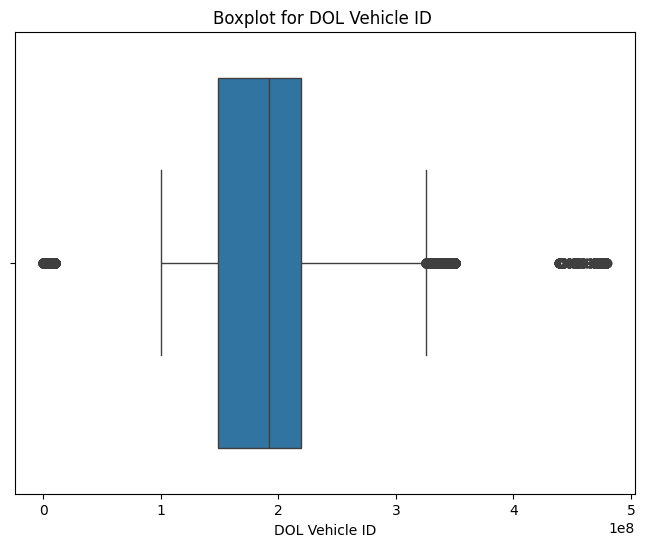

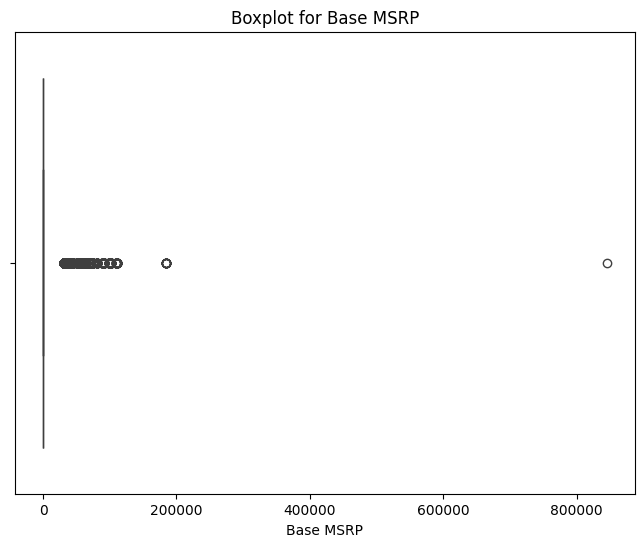

In [15]:
# Checking the outliers
plt.figure(figsize=(8,6))
sns.boxplot(x=df["Electric Range"])
plt.title("Boxplot for Electric Range")
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x=df["DOL Vehicle ID"])
plt.title("Boxplot for DOL Vehicle ID ")
plt.show

plt.figure(figsize=(8,6))
sns.boxplot(x=df["Base MSRP"])
plt.title("Boxplot for Base MSRP")
plt.show()

### Univariate Analysis

In [ ]:
df.describe

In [21]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [22]:
df.describe()

Postal Code     Model Year  Electric Range      Base MSRP  \
count  112634.000000  112634.000000   112634.000000  112634.000000   
mean    98156.226850    2019.003365       87.812987    1793.439681   
std      2648.733064       2.892364      102.334216   10783.753486   
min      1730.000000    1997.000000        0.000000       0.000000   
25%     98052.000000    2017.000000        0.000000       0.000000   
50%     98119.000000    2020.000000       32.000000       0.000000   
75%     98370.000000    2022.000000      208.000000       0.000000   
max     99701.000000    2023.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         112634.000000    1.126340e+05       1.126340e+05  
mean              29.805604    1.994567e+08       5.296650e+10  
std               14.681869    9.398427e+07       1.699104e+09  
min                1.000000    4.777000e+03       1.101001e+09  
25%               18.000000    1.484142e+08       5.303301e+10  
50%               34.000000    1.923896e+08       5.303303e+10  
75%               43.000000    2.191899e+08       5.305307e+10  
max               49.000000    4.792548e+08       5.603300e+10

In [28]:
# Univariate analysis for categorical columns (non-visual)
print("Frequency of categorical variables:")
print(df['Make'].value_counts())
print("*"*50)
print(df["City"].value_counts())


Frequency of categorical variables:
Make
TESLA             52078
NISSAN            12880
CHEVROLET         10182
FORD               5819
BMW                4680
KIA                4483
TOYOTA             4405
VOLKSWAGEN         2514
AUDI               2332
VOLVO              2288
CHRYSLER           1794
HYUNDAI            1412
JEEP               1152
RIVIAN              885
FIAT                822
PORSCHE             818
HONDA               792
MINI                632
MITSUBISHI          588
POLESTAR            558
MERCEDES-BENZ       506
SMART               273
JAGUAR              219
LINCOLN             168
CADILLAC            108
LUCID MOTORS         65
SUBARU               59
LAND ROVER           38
LEXUS                33
FISKER               20
GENESIS              18
AZURE DYNAMICS        7
TH!NK                 3
BENTLEY               3
Name: count, dtype: int64
**************************************************
City
Seattle         20305
Bellevue         5921
Redmond          

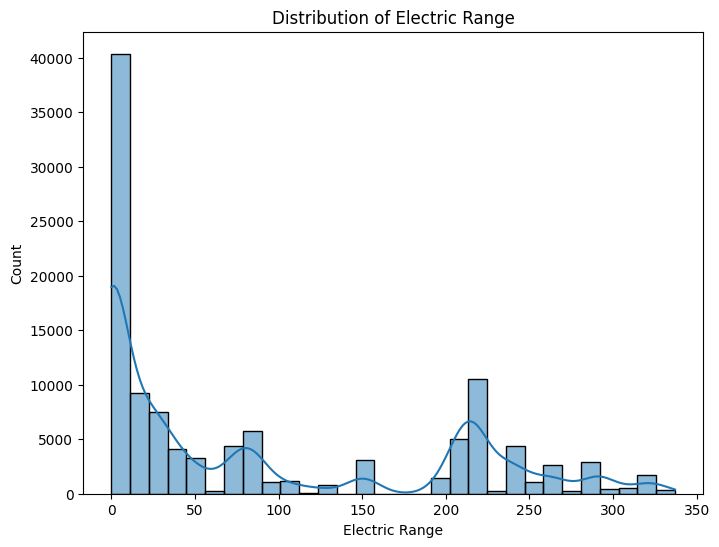

In [30]:
# Visual univariate analysis for numerical data - Histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['Electric Range'], kde=True, bins=30)
plt.title('Distribution of Electric Range')
plt.show()


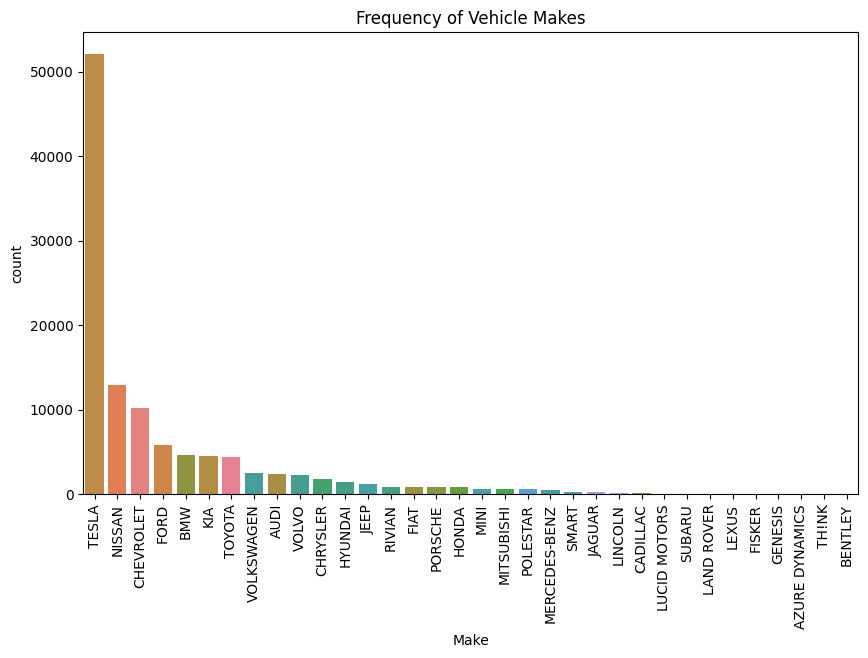

In [34]:
 # Visual univariate analysis for categorical data - Bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Make', order=df['Make'].value_counts().index,hue='Make')
plt.title('Frequency of Vehicle Makes')
plt.xticks(rotation=90)
plt.show()


In [45]:
df.City.value_counts()

City
Seattle         20305
Bellevue         5921
Redmond          4201
Vancouver        4013
Kirkland         3598
                ...  
Hartline            1
Gaithersburg        1
El Paso             1
Klickitat           1
Worley              1
Name: count, Length: 629, dtype: int64

In [48]:
data = df.copy()

In [50]:
data.head()

VIN (1-10)     County      City State  Postal Code  Model Year       Make  \
0  JTMEB3FV6N     Monroe  Key West    FL        33040        2022     TOYOTA   
1  1G1RD6E45D      Clark  Laughlin    NV        89029        2013  CHEVROLET   
2  JN1AZ0CP8B     Yakima    Yakima    WA        98901        2011     NISSAN   
3  1G1FW6S08H     Skagit  Concrete    WA        98237        2017  CHEVROLET   
4  3FA6P0SU1K  Snohomish   Everett    WA        98201        2019       FORD   

        Model                   Electric Vehicle Type  \
0  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
1        VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
2        LEAF          Battery Electric Vehicle (BEV)   
3     BOLT EV          Battery Electric Vehicle (BEV)   
4      FUSION  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible              42   
1           Clean Alternative Fuel Vehicle Eligible              38   
2           Clean Alternative Fuel Vehicle Eligible              73   
3           Clean Alternative Fuel Vehicle Eligible             238   
4             Not eligible due to low battery range              26   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0             29.805604       198968248   
1          0             29.805604         5204412   
2          0             15.000000       218972519   
3          0             39.000000       186750406   
4          0             38.000000         2006714   

              Vehicle Location                               Electric Utility  \
0    POINT (-81.80023 24.5545)  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)   
1  POINT (-114.57245 35.16815)  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)   
2  POINT (-120.50721 46.60448)                                     PACIFICORP   
3   POINT (-121.7515 48.53892)                         PUGET SOUND ENERGY INC   
4  POINT (-122.20596 47.97659)                         PUGET SOUND ENERGY INC   

   2020 Census Tract  
0        12087972100  
1        32003005702  
2        53077001602  
3        53057951101  
4        53061041500

In [60]:

# Step 1: Calculate frequency of each category
category_counts = data['City'].value_counts()

# Step 2: Define a threshold for frequency (e.g., categories that occur less than 2 times)
threshold = 2000
outliers = category_counts[category_counts < threshold].index

# Step 3: Replace outliers with NaN (or 'Other', etc.)
data['City'] = data['City'].replace(outliers, 'Other')



In [57]:
data.City.value_counts()

City
Other        60067
Seattle      20305
Bellevue      5921
Redmond       4201
Vancouver     4013
Kirkland      3598
Bothell       3335
Sammamish     3292
Renton        2778
Olympia       2745
Tacoma        2379
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of city')

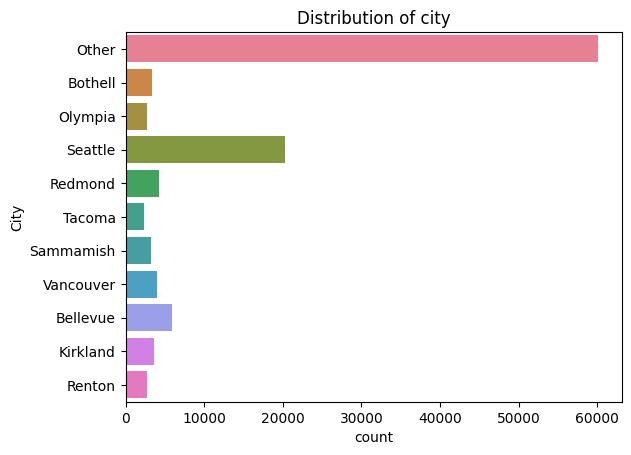

In [81]:
sns.countplot(data= data,y=data['City'],hue = 'City')
plt.title("Distribution of city")

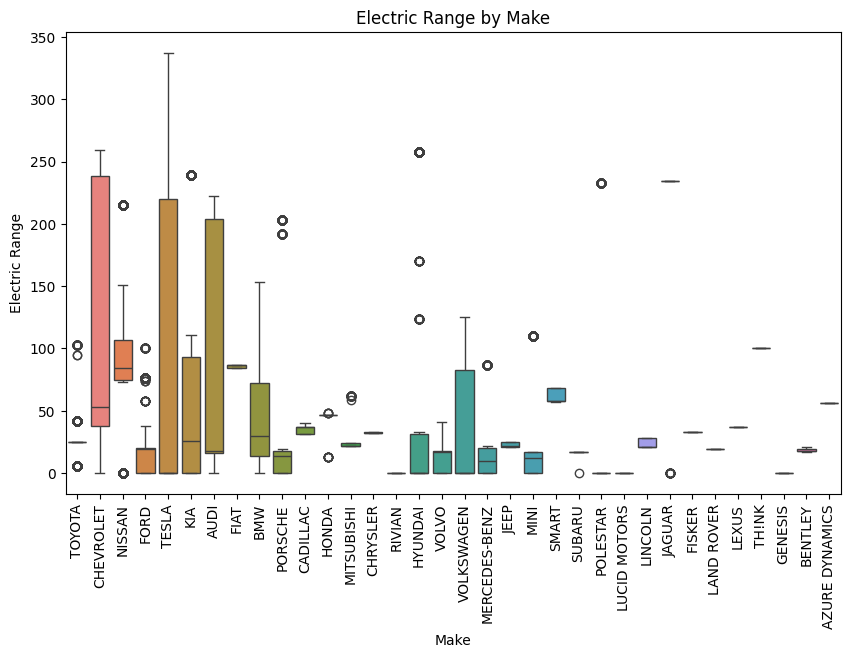

In [85]:
# Box plot: Electric Range by Make
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Make', y='Electric Range',hue='Make')
plt.title('Electric Range by Make')
plt.xticks(rotation=90)
plt.show()



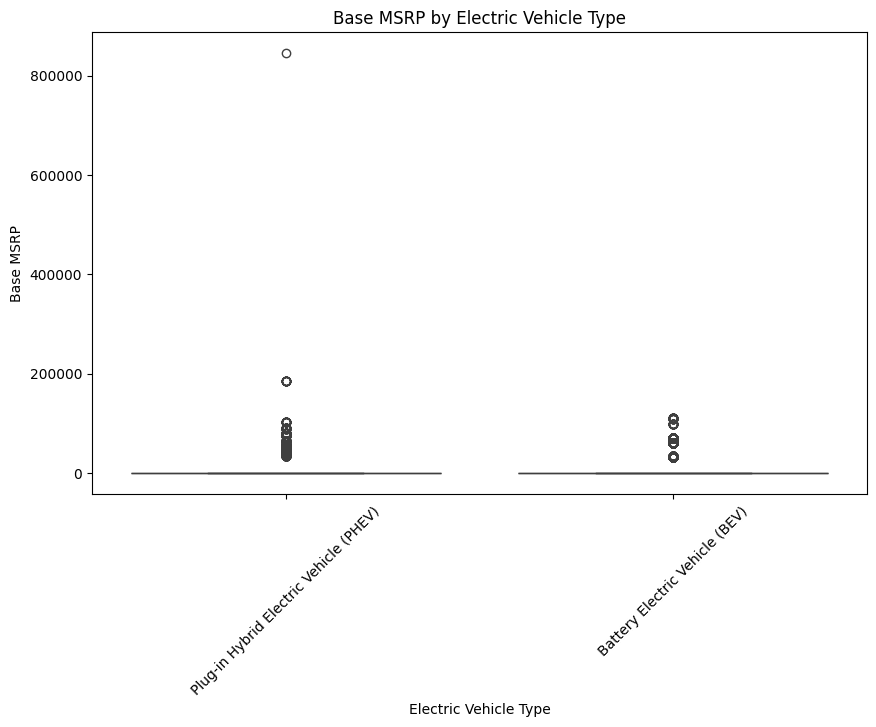

In [86]:
# Box plot: Base MSRP by Electric Vehicle Type
#cate vs numeri
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Electric Vehicle Type', y='Base MSRP')
plt.title('Base MSRP by Electric Vehicle Type')
plt.xticks(rotation=45)
plt.show()

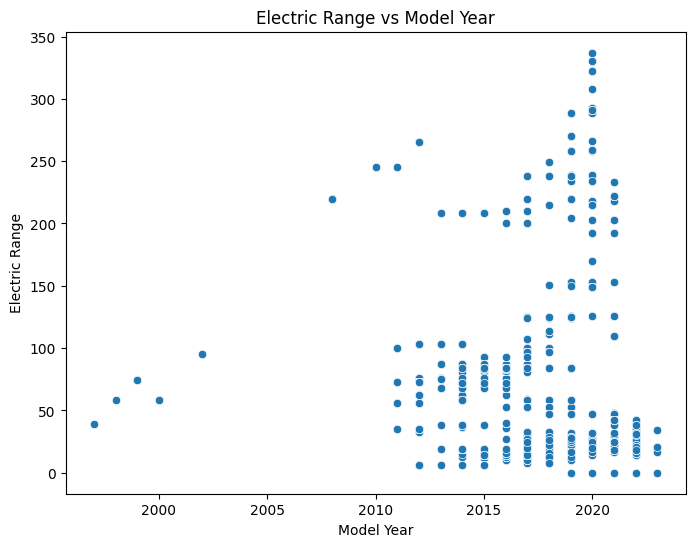

In [88]:
 # Scatter plot: Electric Range vs Model Year
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Model Year', y='Electric Range')
plt.title('Electric Range vs Model Year')
plt.show()

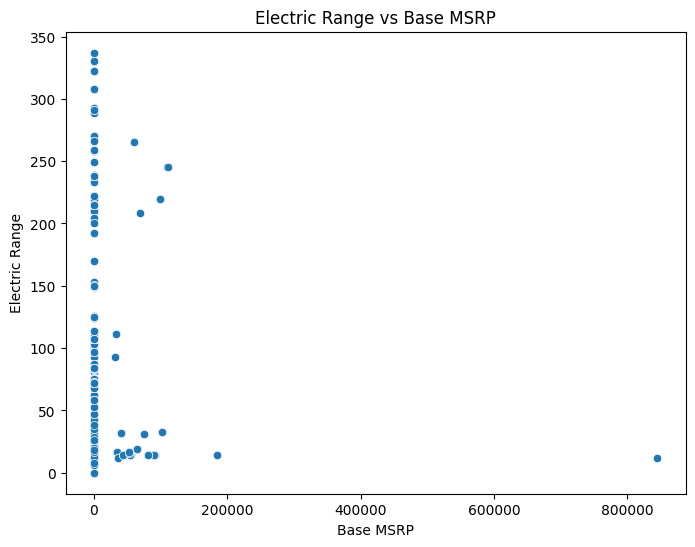

In [90]:
# Scatter plot: Electric Range vs Base MSRP
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Base MSRP', y='Electric Range')
plt.title('Electric Range vs Base MSRP')
plt.show()


In [92]:
 # Average Electric Range by Make
print(data.groupby('Make')['Electric Range'].mean())
# Average Base MSRP by Make
print(data.groupby('Make')['Base MSRP'].mean())


Make
AUDI               62.876930
AZURE DYNAMICS     56.000000
BENTLEY            18.666667
BMW                46.657479
CADILLAC           35.537037
CHEVROLET         109.766549
CHRYSLER           32.361204
FIAT               85.624088
FISKER             33.000000
FORD               16.848084
GENESIS             0.000000
HONDA              46.618687
HYUNDAI            48.228754
JAGUAR            207.287671
JEEP               22.707465
KIA                67.631943
LAND ROVER         19.000000
LEXUS              37.000000
LINCOLN            23.083333
LUCID MOTORS        0.000000
MERCEDES-BENZ      22.055336
MINI               26.604430
MITSUBISHI         26.746599
NISSAN             89.326941
POLESTAR           40.921147
PORSCHE            54.090465
RIVIAN              0.000000
SMART              62.282051
SUBARU             16.711864
TESLA             118.162756
TH!NK             100.000000
TOYOTA             26.044268
VOLKSWAGEN         43.762530
VOLVO              14.448864
Name: Ele

In [93]:
!pip install bar-chart-race

Defaulting to user installation because normal site-packages is not writeable


In [94]:
import bar_chart_race as bcr

In [95]:
 make_year_counts = df.groupby(["Make", "Model Year"])
make_year_counts.head()


VIN (1-10)     County        City State  Postal Code  Model Year  \
0       JTMEB3FV6N     Monroe    Key West    FL        33040        2022   
1       1G1RD6E45D      Clark    Laughlin    NV        89029        2013   
2       JN1AZ0CP8B     Yakima      Yakima    WA        98901        2011   
3       1G1FW6S08H     Skagit    Concrete    WA        98237        2017   
4       3FA6P0SU1K  Snohomish     Everett    WA        98201        2019   
...            ...        ...         ...   ...          ...         ...   
95445   537LS7D49C     Kitsap   Bremerton    WA        98312        2012   
98746   1FT6W1EV4P   Kittitas  Ellensburg    WA        98926        2023   
99680   JT3GS10V32       King   Sammamish    WA        98075        2002   
110308  1FTZR0812X     Pierce      Graham    WA        98338        1999   
112267  1FTVW1EL4P   Kittitas  Ellensburg    WA        98926        2023   

                  Make                     Model  \
0               TOYOTA                RAV4 PRIME   
1            CHEVROLET                      VOLT   
2               NISSAN                      LEAF   
3            CHEVROLET                   BOLT EV   
4                 FORD                    FUSION   
...                ...                       ...   
95445   AZURE DYNAMICS  TRANSIT CONNECT ELECTRIC   
98746             FORD                     F-150   
99680           TOYOTA                      RAV4   
110308            FORD                    RANGER   
112267            FORD                     F-150   

                         Electric Vehicle Type  \
0       Plug-in Hybrid Electric Vehicle (PHEV)   
1       Plug-in Hybrid Electric Vehicle (PHEV)   
2               Battery Electric Vehicle (BEV)   
3               Battery Electric Vehicle (BEV)   
4       Plug-in Hybrid Electric Vehicle (PHEV)   
...                                        ...   
95445           Battery Electric Vehicle (BEV)   
98746           Battery Electric Vehicle (BEV)   
99680           Battery Electric Vehicle (BEV)   
110308          Battery Electric Vehicle (BEV)   
112267          Battery Electric Vehicle (BEV)   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0                 Clean Alternative Fuel Vehicle Eligible              42   
1                 Clean Alternative Fuel Vehicle Eligible              38   
2                 Clean Alternative Fuel Vehicle Eligible              73   
3                 Clean Alternative Fuel Vehicle Eligible             238   
4                   Not eligible due to low battery range              26   
...                                                   ...             ...   
95445             Clean Alternative Fuel Vehicle Eligible              56   
98746   Eligibility unknown as battery range has not b...               0   
99680             Clean Alternative Fuel Vehicle Eligible              95   
110308            Clean Alternative Fuel Vehicle Eligible              74   
112267  Eligibility unknown as battery range has not b...               0   

        Base MSRP  Legislative District  DOL Vehicle ID  \
0               0             29.805604       198968248   
1               0             29.805604         5204412   
2               0             15.000000       218972519   
3               0             39.000000       186750406   
4               0             38.000000         2006714   
...           ...                   ...             ...   
95445           0             35.000000       347393252   
98746           0             13.000000       225794614   
99680           0             41.000000       175935672   
110308          0              2.000000       215121742   
112267          0             13.000000       221472548   

                   Vehicle Location  \
0         POINT (-81.80023 24.5545)   
1       POINT (-114.57245 35.16815)   
2       POINT (-120.50721 46.60448)   
3        POINT (-121.7515 48.53892)   
4       POINT (-122.20596 47.97659)   
.

In [109]:
make_by_year = df.groupby(['Model Year', 'Make']).size().reset_index(name='EV Count')
unique_makes = df['Make'].unique()

In [112]:
all_years = pd.DataFrame({'Model Year': sorted(df['Model Year'].unique())})
all_combinations = all_years.assign(key=1).merge(pd.DataFrame({'Make': unique_makes, 'key':1}), on='key').drop('key', axis=1)
make_by_year_full = all_combinations.merge(make_by_year, on=['Model Year', 'Make'], how='left').fillna(0)
make_by_year_full['EV Count'] = make_by_year_full['EV Count'].astype(int)

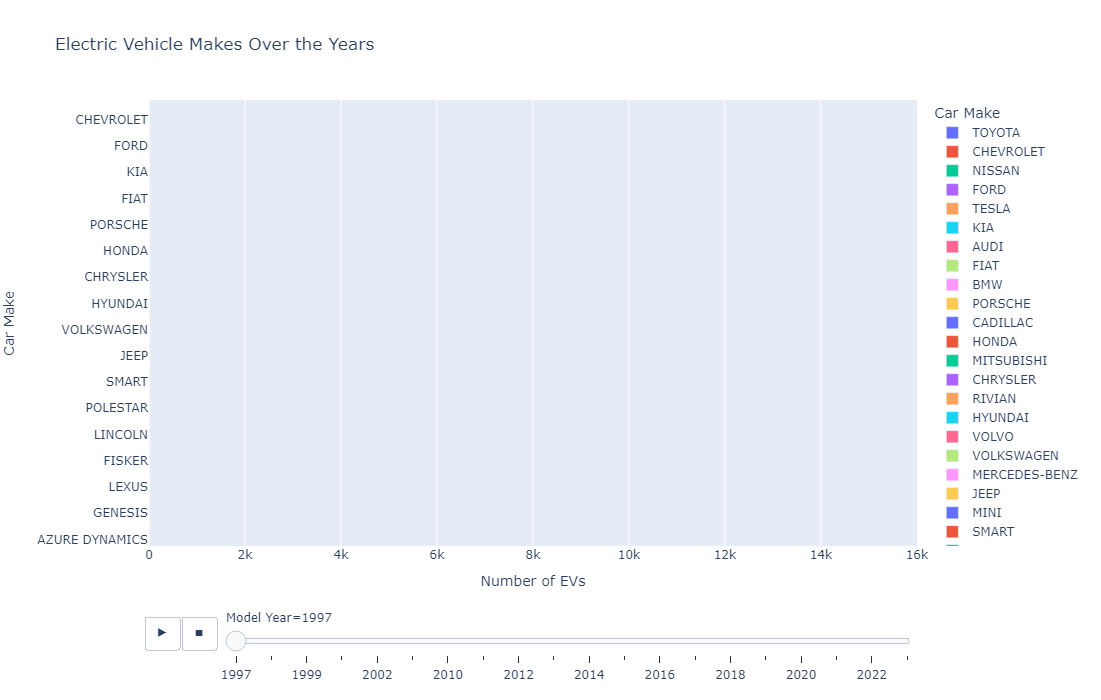

In [115]:
fig = px.bar(
    make_by_year_full,  
    x='EV Count',
    y='Make',  
    color='Make', # Color by car Make
    animation_frame='Model Year',  # Animation by year
    orientation='h', 
    title='Electric Vehicle Makes Over the Years',
    labels={'EV Count':'Number of EVs', 'Make':'Car Make'}, 
    range_x=[0, ev_make_by_year_full['EV Count'].max() * 1.1],
    height=700 
)
fig.show()

In [116]:
! pip install plotly

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
    --------------------------------------- 0.3/19.1 MB ? eta -:--:--
    --------------------------------------- 0.3/19.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/19.1 MB 699.0 kB/s eta 0:00:27
   - -------------------------------------- 0.5/19.1 MB 699.0 kB/s eta 0:00:27
   - -------------------------------------- 0.8/19.1 MB 699.0 kB/s eta 0:00:27
   - -------------------------------------- 0.8/19.1 MB 699.0 kB/s eta 0:00:27
   - -------------------------------------- 0.8/19.1 MB 699.0 kB/s eta 0:00:27
   -- ------------------------------------- 1.0/19.1 MB 535.4 kB/s eta 0:00:34
   -- ------------------------------------- 1.0/19.1 MB 535.4 kB/s eta 0:00:34
   -- ------------------------------------- 1.3/19.1 MB 559.2 kB/s eta 0:00:32
   -- ----

In [127]:
import plotly.express as px



In [124]:
fig = px.choropleth(data,
locations='Postal Code',
color='Base MSRP',
locationmode='USA-states',
animation_frame='Model Year',
title='Animated Choropleth Map of Average Base MSRP by.Postal Code Over Years')
fig.show()

In [125]:
state_data = data.groupby('State')['VIN (1-10)'].count().reset_index()
state_data.columns = ['State', 'EV Count']

fig = px.choropleth(state_data, 
                    locations='State', 
                    locationmode='USA-states', 
                    color='EV Count', 
                    color_continuous_scale='greens', 
                    scope='usa',
                    labels={'EV Count': 'Number of EV Vehicles'},
                    title='Number of Electric Vehicles by State')

fig.show()


In [126]:
ev_count_by_state = df.groupby('State').size().reset_index(name='Number_of_EV_Vehicles')
ev_count_by_state
# Count the number of EVs per state
ev_count_by_state = df['State'].value_counts().reset_index()
ev_count_by_state.columns = ['State', 'EV_Count']

# Create the Choropleth map
fig = px.choropleth(ev_count_by_state,
                    locations='State', 
                    locationmode="USA-states", 
                    color='EV_Count',
                    scope="usa",
                    color_continuous_scale="Viridis",
                    title="Number of Electric Vehicles by State")

# Update the layout
fig.update_layout(
    title_x=0.5,
    geo_scope='usa',
)

fig.show()
